# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv('../../../../My_Keys.env')

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Create two variables called my_btc and my_eth. Set them equal to 1.2 and 5.3
my_btc = 1.2
my_eth = 5.3


In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

### Fetching and computating Bitcoin price

In [5]:
# Fetch current BTC price
btc_price_api = requests.get(btc_url).json()
print(json.dumps(btc_price_api, indent=4))


{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 19561100,
            "total_supply": 19561100,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 41815.0,
                    "volume_24h": 41585979644,
                    "market_cap": 819932841882,
                    "percentage_change_1h": -0.198365738873028,
                    "percentage_change_24h": 5.63007815517148,
                    "percentage_change_7d": 13.3609956725884,
                    "percent_change_1h": -0.198365738873028,
                    "percent_change_24h": 5.63007815517148,
                    "percent_change_7d": 13.3609956725884
                }
            },
            "last_updated": 1701722365
        }
    },
    "metadata": {
        "timestamp": 1701722365,
        "num_crypt

In [6]:
# Compute current value of my Bitcon
btc_price = btc_price_api['data']['1']['quotes']["USD"]["price"]
my_btc_value = btc_price * my_btc


### Fetching and computating Ethereum price

In [7]:
# Fetch current ETH price
eth_price_api = requests.get(eth_url).json()
print(json.dumps(eth_price_api, indent=4))


{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 120233028,
            "total_supply": 120233028,
            "max_supply": 120233028,
            "quotes": {
                "USD": {
                    "price": 2230.39,
                    "volume_24h": 31187844351,
                    "market_cap": 268736922208,
                    "percentage_change_1h": 0.10133920486351,
                    "percentage_change_24h": 2.89987200065055,
                    "percentage_change_7d": 11.8377321114035,
                    "percent_change_1h": 0.10133920486351,
                    "percent_change_24h": 2.89987200065055,
                    "percent_change_7d": 11.8377321114035
                }
            },
            "last_updated": 1701722362
        }
    },
    "metadata": {
        "timestamp": 1701722362,
        "nu

In [8]:
# Compute current value of my Ethereum
eth_price = eth_price_api['data']['1027']["quotes"]["USD"]["price"]
my_eth_value = eth_price * my_eth


### Crypto Wallet Balances

In [9]:
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $50178.00
The current value of your 5.3 ETH is $11821.07


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [10]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [11]:
# Setup Alpaca API environment
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# API object--
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [12]:
# Format current date as ISO format
today = pd.Timestamp('2023-11-29', tz='America/New_York').isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
stock_df = alpaca.get_bars(
    tickers, 
    timeframe, 
    start = today, 
    end = today
).df
# Reorganize the DataFrame
# Separate ticker data
agg_df = stock_df[stock_df['symbol']=='AGG'].drop('symbol', axis=1)
spy_df = stock_df[stock_df['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
stock_df = pd.concat([agg_df,spy_df], axis=1, keys=['AGG', 'SPY'])

# Drop the time component of the date
stock_df.index = stock_df.index.date

# Preview DataFrame
stock_df

AGG                                                          \
            close    high      low trade_count   open   volume       vwap   
2023-11-29  96.58  96.665  96.3414       33859  96.42  8006828  96.526365   

               SPY                                                           
             close    high    low trade_count    open    volume        vwap  
2023-11-29  454.61  458.32  454.2      455449  457.15  63145994  455.817869

In [13]:
# Pick AGG and SPY close prices
agg_close_price = float(stock_df['AGG']['close'])
spy_close_price = float(stock_df['SPY']['close'])

#spy_close_price
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $96.58
Current SPY closing price: $454.61


C:\Users\jahun\AppData\Local\Temp\ipykernel_10236\2403533059.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  agg_close_price = float(stock_df['AGG']['close'])
C:\Users\jahun\AppData\Local\Temp\ipykernel_10236\2403533059.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  spy_close_price = float(stock_df['SPY']['close'])


In [14]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22730.50
The current value of your 200 AGG shares is $19316.00


### Savings Health Analysis

In [15]:
# Set monthly household income
monthly_income = 12000
# Consolidate financial assets data
crypto = my_btc_value + my_eth_value
shares = my_agg_value + my_spy_value
# Create savings DataFrame
df_savings = pd.DataFrame({'amount': [crypto, shares]},['crypto','shares'])

# Display savings DataFrame -- thats a new one for me
display(df_savings)

,amount
crypto,61999.067
shares,42046.500


<Axes: title={'center': 'My Investments'}, ylabel='amount'>

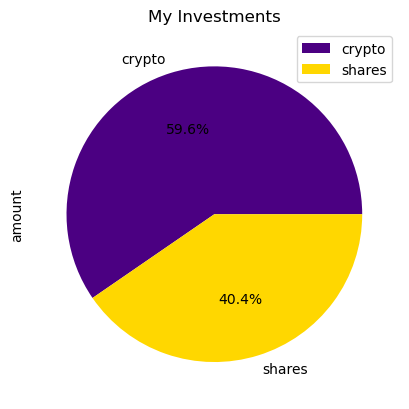

In [16]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title= "My Investments", autopct='%1.1f%%', colors=['indigo', 'gold'])

In [17]:
monthly_income = 12000
emergency_fund = monthly_income * 3

savings = 53000

if savings > emergency_fund:
    print("Congratulations! You have reached your financial goal and have more than 3 times your income saved!")
elif savings == emergency_fund:
    print("Congratulations! You reach the goal of having enough to establish your emergency fund!")
else:
    funds_needed = emergency_fund - int(savings)
    print(f"You need ${funds_needed} to reach your emergency fund goal!")


Congratulations! You have reached your financial goal and have more than 3 times your income saved!


In [18]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
savings = df_savings.sum().iloc[0]

# Validate saving health
if savings > emergency_fund:
    print("Congratulations! You have reached your financial goal of establishing your emergency fund and more!")
elif savings == emergency_fund:
    print("Congratulations! You reach the goal of having enough to establish your emergency fund!")
else:
    funds_needed = emergency_fund - int(savings)
    print(f"You need ${funds_needed} to reach your emergency fund goal!")  


Congratulations! You have reached your financial goal of establishing your emergency fund and more!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [19]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2018-11-29', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-11-29', tz='America/New_York').isoformat()

In [20]:
# Get 5 years' worth of historical data for SPY and AGG
stock_data = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Reorganize the DataFrame
# Separate ticker data
agg_stock = stock_data[stock_data['symbol']=='AGG'].drop('symbol', axis=1)
spy_stock = stock_data[stock_data['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([agg_stock,spy_stock], axis=1, keys=['AGG', 'SPY'])

# Display sample data
df_stock_data.head()

AGG                                        \
                            close      high     low trade_count    open   
timestamp                                                                 
2018-11-29 05:00:00+00:00  104.91  104.9900  104.84       18266  104.92   
2018-11-30 05:00:00+00:00  104.88  104.9600  104.82       20661  104.93   
2018-12-03 05:00:00+00:00  104.80  104.8600  104.63       23611  104.69   
2018-12-04 05:00:00+00:00  105.08  105.2799  104.94       14725  104.98   
2018-12-06 05:00:00+00:00  105.34  105.5400  105.28       19148  105.29   

                                                     SPY                   \
                             volume        vwap    close    high      low   
timestamp                                                                   
2018-11-29 05:00:00+00:00   6039512  104.911142  273.950  275.55  272.430   
2018-11-30 05:00:00+00:00   6012326  104.871942  275.685  276.28  273.450   
2018-12-03 05:00:00+00:00  14320801  104.768468  279.260  280.40  277.505   
2018-12-04 05:00:00+00:00   5971915  105.085107  270.390  278.85  269.900   
2018-12-06 05:00:00+00:00   7665752  105.374036  269.770  269.97  262.440   

                                                                      
                          trade_count    open     volume        vwap  
timestamp                                                             
2018-11-29 05:00:00+00:00      393270  273.71   83664985  273.949833  
2018-11-30 05:00:00+00:00      340106  273.81  100386880  275.091490  
2018-12-03 05:00:00+00:00      473013  280.28  104690284  278.951299  
2018-12-04 05:00:00+00:00      864734  278.37  182203555  272.918990  
2018-12-06 05:00:00+00:00     1061720  265.92  207107459  266.618323

In [21]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30years = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)


In [22]:
# Print the simulation input data
MC_30years.portfolio_data.dropna().head()

AGG                                        \
                            close      high     low trade_count    open   
timestamp                                                                 
2018-11-30 05:00:00+00:00  104.88  104.9600  104.82       20661  104.93   
2018-12-03 05:00:00+00:00  104.80  104.8600  104.63       23611  104.69   
2018-12-04 05:00:00+00:00  105.08  105.2799  104.94       14725  104.98   
2018-12-06 05:00:00+00:00  105.34  105.5400  105.28       19148  105.29   
2018-12-07 05:00:00+00:00  105.48  105.5500  105.28       15653  105.39   

                                                                  SPY          \
                             volume        vwap daily_return    close    high   
timestamp                                                                       
2018-11-30 05:00:00+00:00   6012326  104.871942    -0.000286  275.685  276.28   
2018-12-03 05:00:00+00:00  14320801  104.768468    -0.000763  279.260  280.40   
2018-12-04 05:00:00+00:00   5971915  105.085107     0.002672  270.390  278.85   
2018-12-06 05:00:00+00:00   7665752  105.374036     0.002474  269.770  269.97   
2018-12-07 05:00:00+00:00   5641771  105.448449     0.001329  263.660  271.22   

                                                                               \
                               low trade_count    open     volume        vwap   
timestamp                                                                       
2018-11-30 05:00:00+00:00  273.450      340106  273.81  100386880  275.091490   
2018-12-03 05:00:00+00:00  277.505      473013  280.28  104690284  278.951299   
2018-12-04 05:00:00+00:00  269.900      864734  278.37  182203555  272.918990   
2018-12-06 05:00:00+00:00  262.440     1061720  265.92  207107459  266.618323   
2018-12-07 05:00:00+00:00  262.630      869798  269.46  163396256  265.648060   

                                        
                          daily_return  
timestamp                               
2018-11-30 05:00:00+00:00     0.006333  
2018-12-03 05:00:00+00:00     0.012968  
2018-12-04 05:00:00+00:00    -0.031763  
2018-12-06 05:00:00+00:00    -0.002293  
2018-12-07 05:00:00+00:00    -0.022649

In [23]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 110.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 120.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 130.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 140.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 150.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 160.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 170.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 180.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 190.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 200.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 210.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 220.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 230.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 240.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 250.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 260.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 270.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 280.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 290.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 300.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 310.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 320.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 330.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 340.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 350.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 360.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 370.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 380.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 390.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 400.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 410.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 420.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 430.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 440.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 450.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 460.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 470.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 480.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 490.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995636,1.007556,1.006445,0.997877,0.988631,0.994234,0.995610,0.986197,1.019109,1.003529,...,0.988880,0.994952,1.009432,0.997749,0.994420,1.009532,0.999410,1.007051,0.998411,1.009369
2,0.994280,1.011607,1.003629,1.001413,0.994923,0.994450,1.000718,0.993331,1.023859,1.012981,...,0.992808,0.996046,1.019479,0.999658,1.002547,1.013006,1.000250,1.009125,0.995936,0.999026
3,0.981099,1.013847,1.007786,1.002784,1.006717,1.001623,0.993959,0.980209,1.037284,1.013116,...,0.990882,0.988384,1.024086,1.002529,1.009387,1.030104,0.998161,1.015117,1.001336,1.002852
4,0.981759,1.010545,1.008993,1.005866,1.014707,1.015224,0.996563,0.989818,1.037411,1.010778,...,0.986511,0.997411,1.019014,1.009414,0.989454,1.028359,0.994506,1.012744,0.998192,1.014325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,19.622814,7.124103,13.866490,2.539287,2.220715,3.609594,5.338292,2.017587,6.203712,6.533884,...,12.846120,4.584273,24.567820,5.249449,4.925975,6.011293,8.300827,9.240485,4.787234,9.386271
7557,19.648365,7.117132,14.118401,2.520716,2.264658,3.566644,5.369687,2.004392,6.186726,6.536184,...,12.859720,4.564827,24.535479,5.222364,4.887484,6.019683,8.455249,9.373476,4.861815,9.235831
7558,19.598533,7.232731,14.133912,2.546378,2.253161,3.565838,5.333871,1.996171,6.177558,6.480051,...,13.034366,4.571231,24.692059,5.203576,4.873355,6.077985,8.511923,9.260193,4.853676,9.203138
7559,19.629140,7.143132,14.381780,2.562678,2.264635,3.636076,5.313566,1.991201,6.179454,6.418350,...,12.902261,4.503053,24.927700,5.260490,4.879097,6.131594,8.554703,9.355929,4.915225,9.172846


<Axes: title={'center': '500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

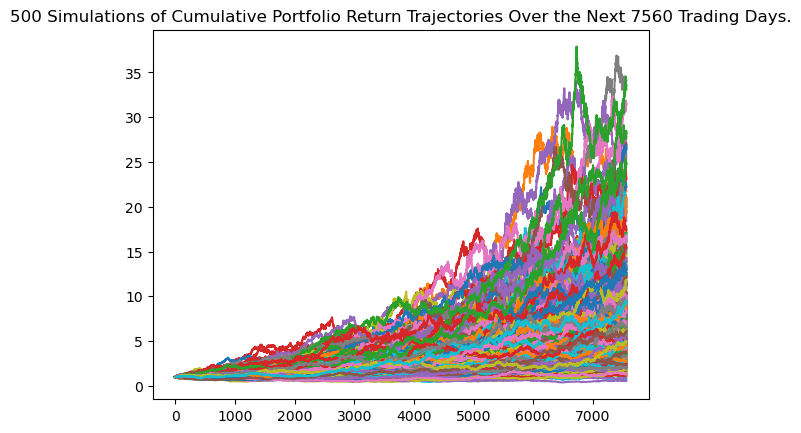

In [24]:
# Plot simulation outcomes
MC_30years.plot_simulation()


<Axes: title={'center': 'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

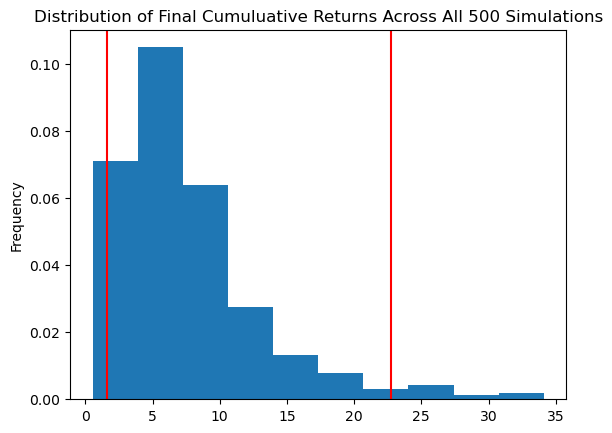

In [25]:
# Plot probability distribution and confidence intervals
MC_30years.plot_distribution()


### Retirement Analysis

In [26]:
metrics = MC_30years.simulated_return.iloc[-1].describe()
ci_series = MC_30years.confidence_interval
ci_series.index = ["95% CI Lower","95% CI Upper"]

# Combine the metrics and ci_series
MC_stats = pd.concat([metrics, ci_series])

# Print summary statistics
print(MC_stats)

count           500.000000
mean              7.693477
std               5.404887
min               0.554589
25%               3.956335
50%               6.513268
75%               9.286022
max              34.109104
95% CI Lower      1.628210
95% CI Upper     22.730468
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [27]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(MC_stats[-2]*initial_investment,2)
ci_upper = round(MC_stats[-1]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $32564.2 and $454609.36


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [28]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(MC_stats[-2]*initial_investment,2)
ci_upper = round(MC_stats[-1]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $48846.3 and $681914.05


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [29]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.2,.8],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [30]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 110.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 120.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 130.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 140.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 150.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 160.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 170.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 180.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 190.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 200.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 210.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 220.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 230.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 240.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 250.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 260.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 270.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 280.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 290.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 300.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 310.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 320.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 330.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 340.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 350.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 360.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 370.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 380.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 390.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 400.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 410.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 420.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 430.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 440.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 450.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 460.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 470.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 480.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 490.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006761,0.998001,1.002175,1.010393,1.008995,0.983540,1.001404,0.987527,1.010259,1.012131,...,1.004829,0.983297,1.014438,1.012159,0.995468,1.005161,0.988016,0.999485,0.973587,1.012268
2,0.990478,0.990738,1.012506,0.988734,0.998035,0.983233,0.982335,0.998487,1.013876,1.020253,...,0.995023,0.974311,0.997875,1.014687,0.994945,1.020326,0.984567,0.984362,0.984608,1.020840
3,1.001579,0.994893,1.001418,1.008809,1.012790,0.990862,0.972098,0.993948,1.006179,1.022480,...,0.994720,0.965232,1.004320,1.025886,0.991053,1.009861,0.976265,0.989617,0.994830,1.032584
4,1.016587,1.013180,1.011644,1.006869,1.005133,0.977283,0.959532,0.986693,1.000100,1.013946,...,0.991469,0.975056,1.020874,1.018974,1.004326,1.019375,0.978193,0.985505,0.993919,1.025670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.082758,1.309974,3.641302,1.081864,1.508259,2.036666,0.936279,1.345333,1.769578,1.195959,...,1.040600,0.955586,3.913760,1.863757,1.232079,2.189080,1.798461,1.451219,1.296329,1.559675
1257,1.111152,1.326507,3.635662,1.076103,1.510111,2.023647,0.934232,1.324565,1.776726,1.185804,...,1.048324,0.979299,3.884444,1.895804,1.240702,2.191180,1.790335,1.441503,1.294117,1.567985
1258,1.110703,1.326870,3.600329,1.091254,1.483390,2.008773,0.932099,1.347109,1.793251,1.176012,...,1.039103,0.987924,3.852919,1.902417,1.234609,2.183205,1.800951,1.449642,1.290256,1.581578
1259,1.106526,1.340477,3.650891,1.064720,1.474319,2.030158,0.936739,1.358130,1.799266,1.175884,...,1.050809,0.988850,3.859814,1.938100,1.233558,2.203162,1.763707,1.448807,1.296029,1.558726


<Axes: title={'center': '500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

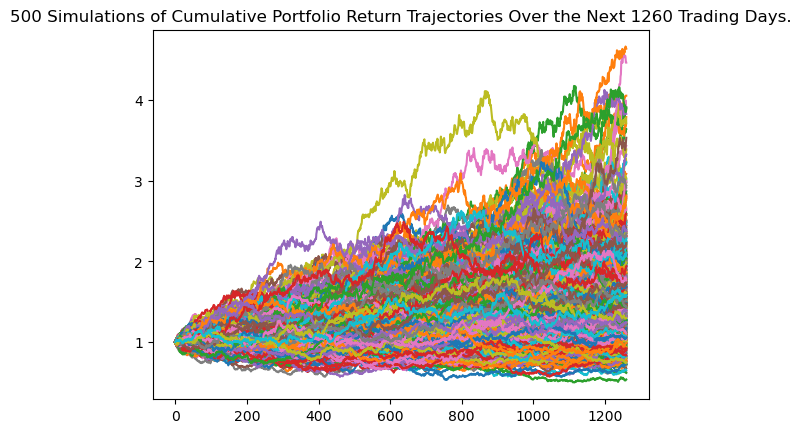

In [31]:
# Plot simulation outcomes
MC_5year.plot_simulation()


<Axes: title={'center': 'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

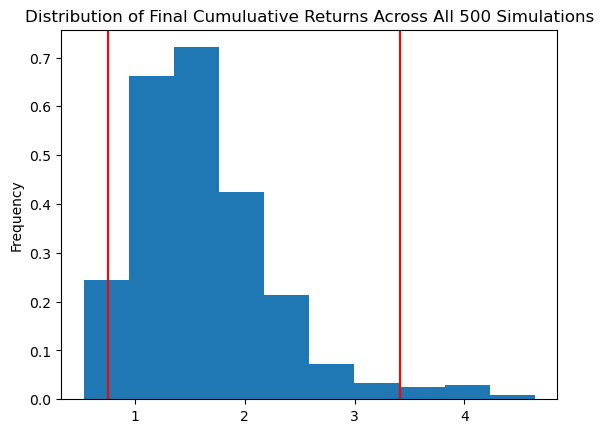

In [32]:
# Plot probability distribution and confidence intervals
MC_5year.plot_distribution()


In [33]:
# Fetch summary statistics from the Monte Carlo simulation results
metrics = MC_5year.simulated_return.iloc[-1].describe()
ci_series = MC_5year.confidence_interval
ci_series.index = ["95% CI Lower","95% CI Upper"]

# Combine the metrics and ci_series
MC_5year_stats = pd.concat([metrics, ci_series])

# Print summary statistics
print(MC_5year_stats)


count           500.000000
mean              1.637639
std               0.646157
min               0.535887
25%               1.194852
50%               1.530035
75%               1.951229
max               4.641472
95% CI Lower      0.754861
95% CI Upper      3.414485
Name: 1260, dtype: float64


In [34]:
# Set initial investment
initial_investment = 80000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower_five = round(MC_5year_stats[-2]*initial_investment,2)
ci_upper_five = round(MC_5year_stats[-1]*initial_investment,2)
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $80000 in the portfolio over the next 5 years will end within in the range of $60388.92 and $273158.81


### Ten Years Retirement Option

In [35]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10year = MCSimulation (
    portfolio_data = df_stock_data,
    weights = [.2,.8],
    num_simulation = 500,
    num_trading_days = 252*10
)


In [36]:
MC_10year.portfolio_data.head()

AGG                                        \
                            close      high     low trade_count    open   
timestamp                                                                 
2018-11-29 05:00:00+00:00  104.91  104.9900  104.84       18266  104.92   
2018-11-30 05:00:00+00:00  104.88  104.9600  104.82       20661  104.93   
2018-12-03 05:00:00+00:00  104.80  104.8600  104.63       23611  104.69   
2018-12-04 05:00:00+00:00  105.08  105.2799  104.94       14725  104.98   
2018-12-06 05:00:00+00:00  105.34  105.5400  105.28       19148  105.29   

                                                                  SPY          \
                             volume        vwap daily_return    close    high   
timestamp                                                                       
2018-11-29 05:00:00+00:00   6039512  104.911142          NaN  273.950  275.55   
2018-11-30 05:00:00+00:00   6012326  104.871942    -0.000286  275.685  276.28   
2018-12-03 05:00:00+00:00  14320801  104.768468    -0.000763  279.260  280.40   
2018-12-04 05:00:00+00:00   5971915  105.085107     0.002672  270.390  278.85   
2018-12-06 05:00:00+00:00   7665752  105.374036     0.002474  269.770  269.97   

                                                                               \
                               low trade_count    open     volume        vwap   
timestamp                                                                       
2018-11-29 05:00:00+00:00  272.430      393270  273.71   83664985  273.949833   
2018-11-30 05:00:00+00:00  273.450      340106  273.81  100386880  275.091490   
2018-12-03 05:00:00+00:00  277.505      473013  280.28  104690284  278.951299   
2018-12-04 05:00:00+00:00  269.900      864734  278.37  182203555  272.918990   
2018-12-06 05:00:00+00:00  262.440     1061720  265.92  207107459  266.618323   

                                        
                          daily_return  
timestamp                               
2018-11-29 05:00:00+00:00          NaN  
2018-11-30 05:00:00+00:00     0.006333  
2018-12-03 05:00:00+00:00     0.012968  
2018-12-04 05:00:00+00:00    -0.031763  
2018-12-06 05:00:00+00:00    -0.002293

In [37]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 110.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 120.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 130.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 140.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 150.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 160.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 170.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 180.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 190.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 200.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 210.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 220.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 230.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 240.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 250.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 260.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 270.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 280.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 290.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 300.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 310.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 320.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 330.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 340.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 350.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 360.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 370.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 380.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 390.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 400.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 410.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 420.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 430.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 440.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 450.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 460.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 470.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 480.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

Running Monte Carlo simulation number 490.


C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jahun\onedrive\desktop\SMU Bootcamp\Homework\financial_planning\Starter_Code\MC

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993184,0.987394,1.007280,0.984687,0.986427,0.994869,0.994630,1.001748,0.984781,0.991880,...,1.009282,1.014066,1.009981,1.005705,1.004407,1.008866,1.001698,1.008671,0.992181,1.015842
2,0.982697,1.018492,1.013673,0.989093,0.994619,1.000144,0.987532,1.017663,0.996847,0.974901,...,1.012955,1.013199,1.001711,1.002610,0.991601,1.007059,1.011360,1.001750,0.982087,0.996808
3,0.987066,1.020398,1.013180,0.992379,0.991431,1.025444,0.994043,1.010069,0.999301,0.975708,...,1.002484,1.020621,1.015897,1.013125,1.006782,1.038230,1.014411,1.026839,0.953132,0.997482
4,0.981466,1.008573,1.016367,1.000561,0.995378,1.045416,0.974527,1.010413,0.999047,0.974458,...,0.998325,1.026983,1.018891,1.022854,0.998683,1.044012,1.014038,1.033676,0.957294,0.994688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.530570,2.652994,2.674102,1.121414,2.752384,3.045754,2.742683,1.292138,4.572119,1.624503,...,3.693213,1.910011,2.496219,2.744021,6.207331,3.746894,4.672666,1.106811,1.677162,2.060296
2517,3.562155,2.693065,2.675046,1.125414,2.774743,3.068008,2.748373,1.301149,4.586441,1.614840,...,3.763350,1.912431,2.465286,2.771433,6.227248,3.699227,4.651799,1.104221,1.658939,2.068430
2518,3.578661,2.629730,2.723425,1.117760,2.766097,3.060129,2.757206,1.321199,4.625537,1.601531,...,3.727990,1.933230,2.452851,2.763817,6.301725,3.682229,4.645649,1.129523,1.672966,2.049210
2519,3.638977,2.578311,2.693072,1.120635,2.799645,3.006745,2.727345,1.320560,4.690862,1.604492,...,3.761923,1.957374,2.452676,2.742455,6.280356,3.677145,4.700518,1.128735,1.687796,2.061031


<Axes: title={'center': '500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

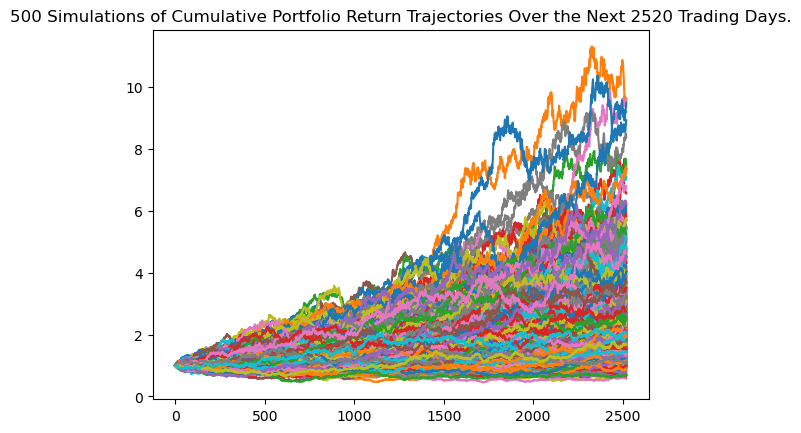

In [38]:
# Plot simulation outcomes
MC_10year.plot_simulation()

<Axes: title={'center': 'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

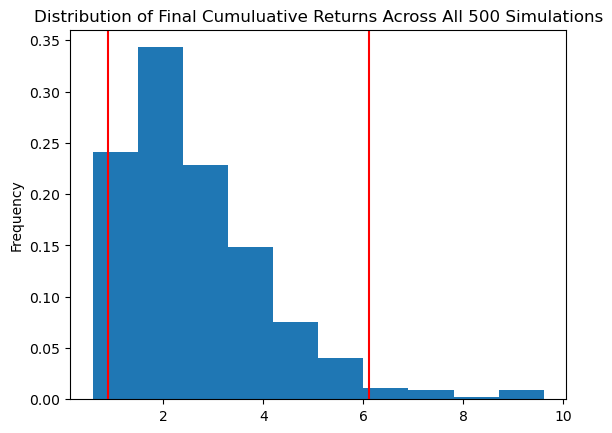

In [39]:
# Plot probability distribution and confidence intervals
MC_10year.plot_distribution()

In [40]:
# Fetch summary statistics from the Monte Carlo simulation results
metrics = MC_10year.simulated_return.iloc[-1].describe()
ci_series = MC_10year.confidence_interval
ci_series.index = ["95% CI Lower","95% CI Upper"]

# Combine the metrics and ci_series
MC_10year_stats = pd.concat([metrics, ci_series])

# Print summary statistics
print(MC_10year_stats)


count           500.000000
mean              2.638053
std               1.474357
min               0.585543
25%               1.556649
50%               2.336895
75%               3.360319
max               9.617690
95% CI Lower      0.898000
95% CI Upper      6.112118
Name: 2520, dtype: float64


In [41]:
# Set initial investment
initial_investment = 110000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower_five = round(MC_10year_stats[-2]*initial_investment,2)
ci_upper_five = round(MC_10year_stats[-1]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")


There is a 95% chance that an initial investment of $110000 in the portfolio over the next 5 years will end within in the range of $98780.05 and $672332.97
